In [153]:
#pandas for reading data from a file
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#for confusion metrics, accurracy, precession, recall
from sklearn import metrics

#for scientific calculation
import numpy as np

#creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels etc.
import matplotlib.pyplot as plt

#for heatmap
import seaborn as sns

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
#read data from file and setting a header of each column
data = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)

#print first 5 data
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [158]:
#split dataset into features columns and answers
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
x = data[feature_cols] # Features
y = data.label # answer

#Spliting data for train and test
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=6)

# Note : if you use a particular value for random_state(random_state = 1 or any other integer value) everytime the result will be same,i.e, same values in train and test datasets.

#get logistic Regression classifier
logReg = LogisticRegression()

#Train the model with data
logReg.fit(X_train,y_train)

#Predict using test data
y_pred=logReg.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0
 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 1 1 1 0]


In [155]:
#make instance of confusion metrics and initialize it
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[115  12]
 [ 26  39]]


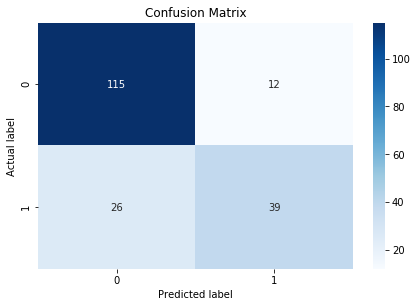

In [156]:
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="Blues" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [157]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 80.20833333333334 %
Precision: 0.7647058823529411
Recall: 0.6
